Starting Learning rate:  0.001
Loss at step 000: 2.235
0.001
The difference is 0.0005230903625488281
Loss at step 500: 1.978
0.001
The difference is 0.0005047321319580078
Loss at step 1000: 1.731
0.001
The difference is 0.00048172473907470703
Loss at step 1500: 1.497
0.001
The difference is 0.0004538297653198242
Loss at step 2000: 1.278
0.001
The difference is 0.0004197359085083008
Loss at step 2500: 1.078
0.001
The difference is 0.00037992000579833984
Loss at step 3000: 0.900
0.001
The difference is 0.00033396482467651367
Loss at step 3500: 0.745
0.001
The difference is 0.00028204917907714844
Loss at step 4000: 0.618
0.001
The difference is 0.0002256631851196289
Loss at step 4500: 0.520
0.001
The difference is 0.0001691579818725586
W : 2.4281909465789795 , b = 1.6517969369888306 
Starting Learning rate:  0.01
Loss at step 000: 2.230
0.01
The difference is 0.0052301883697509766
Loss at step 500: 0.447
0.01
The difference is 0.001172393560409546
Loss at step 1000: 0.325
0.01
The differe

<function matplotlib.pyplot.show>

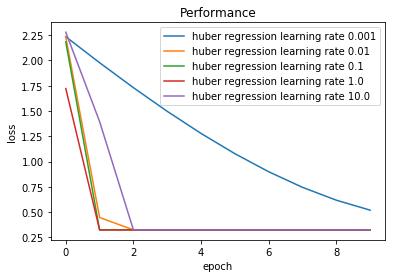

In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import time
import matplotlib.pyplot as plt
import numpy as np
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tfe.enable_eager_execution()
# Create data
NUM_EXAMPLES = 500

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = None
b = None


train_steps = 5000
# Define the linear predictor.
def prediction(x):
  yhat = X * W + b
  return yhat

# Define loss functions of the form: L(y, y_predicted)
def squared_loss(y, y_predicted):
  error = y_predicted - y
  loss = tf.reduce_mean(tf.square(error))
  return loss
# def huber_loss(y, y_predicted, m=1.0):
#   error = y_predicted - y
#   """Huber loss."""
#   loss= tf.reduce_mean(tf.convert_to_tensor([((1/2)*(tf.square(err))) if (tf.math.abs(err)) <=(m) else (m*(tf.math.abs(err))-(1/2)*m*m) for err in error]))
#   return loss
def huber_loss(y,y_predicted, m=1.0):
    error = tf.math.abs(y_predicted - y)
    flag = (error > m)
    loss=(tf.reduce_sum(0.5 * tf.square(tf.boolean_mask( ((error)),(~flag)))) -tf.reduce_sum( m * (0.5 * m -(tf.boolean_mask(error,(flag)  )))))/len(error)
    return loss
def Pseudo_huber_loss(y, y_predicted, m=1.0): #this is the hybrid-strongly_convex L1L2 norm form of huber loss
  error =tf.math.abs(y_predicted - y)
  loss = tf.reduce_mean(m*m*(tf.sqrt(1+(error/m)**2)-1))
  return loss
# for i in range(train_steps):
#   ##TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(squared_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#         print("Loss at step {:03d}: {:.3f}".format(i, squared_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')
# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')

# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(tf.losses.huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, tf.losses.huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')
# print(tf.losses.huber_loss(y,prediction(X)))
for learning_rate in np.logspace(-3,1,num=5,base=10):
  print('Starting Learning rate: ',learning_rate)
  LR=learning_rate
  accuracy=list()
  W = tf.Variable(0.)
  b = tf.Variable(0.)
  for i in range(train_steps):
    temp=Pseudo_huber_loss(y,prediction(X))   
    ###TO DO ## Calculate gradients
    with tf.GradientTape() as tape:
      dW, db = tape.gradient(Pseudo_huber_loss(y,prediction(X)), [W, b])
      W.assign_sub(dW * learning_rate)
      b.assign_sub(db* learning_rate)
      if i % 500 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, Pseudo_huber_loss(y,prediction(X))))
        accuracy.append(Pseudo_huber_loss(y,prediction(X)))
        print(learning_rate)
        print(f'The difference is {temp  -  Pseudo_huber_loss(y,prediction(X))}')
        if temp  -  Pseudo_huber_loss(y,prediction(X)) < 0.00001:
          learning_rate=learning_rate/2
  print(f'W : {W.numpy()} , b = {b.numpy()} ')
  plt.plot(range(len(accuracy)), accuracy,
   label=f"huber regression learning rate {LR}")
plt.title('Performance')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show
#   plt.plot(test_sam_perf[i].keys(), test_sam_perf[i].values())
#   if i==10:
#     plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {}'.format(i))
#   else:
#     if list(test_sam_perf[i-1].values())!=list(test_sam_perf[i].values()):    
#        plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {} '.format(i))
        


TypeError: ignored